In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading dataset 

In [5]:
df = pd.read_excel('HR Data.xlsx')

In [6]:
df.head()

,Attrition,Business Travel,CF_age band,CF_attrition label,Department,Education Field,emp no,Employee Number,Gender,Job Role,...,Performance Rating,Relationship Satisfaction,Standard Hours,Stock Option Level,Total Working Years,Work Life Balance,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager
0,Yes,Travel_Rarely,35 - 44,Ex-Employees,Sales,Life Sciences,STAFF-1,1,Female,Sales Executive,...,3,1,80,0,8,1,6,4,0,5
1,No,Travel_Frequently,45 - 54,Current Employees,R&D,Life Sciences,STAFF-2,2,Male,Research Scientist,...,4,4,80,1,10,3,10,7,1,7
2,Yes,Travel_Rarely,35 - 44,Ex-Employees,R&D,Other,STAFF-4,4,Male,Laboratory Technician,...,3,2,80,0,7,3,0,0,0,0
3,No,Travel_Frequently,25 - 34,Current Employees,R&D,Life Sciences,STAFF-5,5,Female,Research Scientist,...,3,3,80,0,8,3,8,7,3,0
4,No,Travel_Rarely,25 - 34,Current Employees,R&D,Medical,STAFF-7,7,Male,Laboratory Technician,...,3,4,80,1,6,3,2,2,2,2


# Basic insights and understading of given dataset

In [14]:
df.isnull().sum()

Attrition                     0
Business Travel               0
CF_age band                   0
CF_attrition label            0
Department                    0
Education Field               0
emp no                        0
Employee Number               0
Gender                        0
Job Role                      0
Marital Status                0
Over Time                     0
Over18                        0
Training Times Last Year      0
-2                            0
0                             0
Age                           0
CF_current Employee           0
Daily Rate                    0
Distance From Home            0
Education                     0
Employee Count                0
Environment Satisfaction      0
Hourly Rate                   0
Job Involvement               0
Job Level                     0
Job Satisfaction              0
Monthly Income                0
Monthly Rate                  0
Num Companies Worked          0
Percent Salary Hike           0
Performa

### As per output, dataset do not have any null value

In [15]:
df.nunique()

Attrition                        2
Business Travel                  3
CF_age band                      5
CF_attrition label               2
Department                       3
Education Field                  6
emp no                        1470
Employee Number               1470
Gender                           2
Job Role                         9
Marital Status                   3
Over Time                        2
Over18                           1
Training Times Last Year         7
-2                               1
0                                1
Age                             43
CF_current Employee              2
Daily Rate                     886
Distance From Home              29
Education                        5
Employee Count                   1
Environment Satisfaction         4
Hourly Rate                     71
Job Involvement                  4
Job Level                        5
Job Satisfaction                 4
Monthly Income                1349
Monthly Rate        

In [29]:
df.shape

(1470, 41)

In [36]:
df.dtypes

Attrition                     object
Business Travel               object
CF_age band                   object
CF_attrition label            object
Department                    object
Education Field               object
emp no                        object
Employee Number                int64
Gender                        object
Job Role                      object
Marital Status                object
Over Time                     object
Over18                        object
Training Times Last Year       int64
-2                             int64
0                              int64
Age                            int64
CF_current Employee            int64
Daily Rate                     int64
Distance From Home             int64
Education                     object
Employee Count                 int64
Environment Satisfaction       int64
Hourly Rate                    int64
Job Involvement                int64
Job Level                      int64
Job Satisfaction               int64
M

# <font color='Brown'>Objective :  Create an Employee Attrition Analysis Report to gain insights into factors contributing to employee attrition within a company. 
</font>

# 1. Attrition Analysis:

### <font color=''> 1.1 What is the overall attrition rate in the company? </font>

In [74]:
yes = df['Attrition'] =='Yes'
attrition_happend = df[yes]
total_attrition = attrition_happend['Attrition'].count()
total_emp = df['Attrition'].count()

In [70]:
total_rate_attrition = (total_attrition/total_emp)*100
total_rate_attrition`

16.122448979591837

### <font color='darkblue'>237 employees out of 1470 have quite their jobs which is around 16.12% of total employees. </font>

### 1.2 is there a significant difference in attrition rates between different age bands or departments?


In [86]:
df['CF_age band'].unique()

array(['35 - 44', '45 - 54', '25 - 34', 'Over 55', 'Under 25'],
      dtype=object)

In [9]:
attrition_happend_filt = df['Attrition'] == 'Yes'
df_attrition_happend = df[attrition_happend_filt]

In [94]:
df_attrition_happend['CF_age band'].value_counts()

25 - 34     112
35 - 44      51
Under 25     38
45 - 54      25
Over 55      11
Name: CF_age band, dtype: int64

<AxesSubplot:>

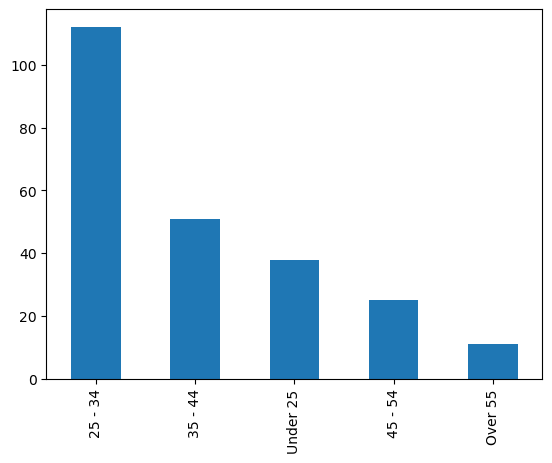

In [95]:
df_attrition_happend['CF_age band'].value_counts().plot(kind='bar')

### <font color='blue'> </font>

### <font color='darkblue'>This bar plot reveals higher attrition rate in the 25-34 years age group and most of people are aged between 25 years to 44 years who are qutting their jobs and there is least attrition rate for above 55 years emploees followed by 45-54 years age band employees.</font>

### 1.3 Does the presence of overtime have any correlation with attrition?

In [122]:
df_attrition_happend['Over Time'].value_counts()

Yes    127
No     110
Name: Over Time, dtype: int64

In [ ]:
df['Attrition'] = df['Attrition'].str.replace('Yes','1')
df['Attrition'] = df['Attrition'].str.replace('No','0')

df['Attrition'] = df['Attrition'].astype('int32')


In [116]:
df['Over Time'] = df['Over Time'].str.replace('Yes','1')
df['Over Time'] = df['Over Time'].str.replace('No','0')

df['Over Time'] = df['Over Time'].astype('int32')

In [129]:
correlation = df['Attrition'].corr(df['Over Time'])
correlation

0.24611799424580422

### <font color='darkblue'>In general case, a correlation coefficient of 0.24 suggests a positive relationship between attrition rate and over time cases, but it's not particularly strong. The closer the correlation coefficient is to 1 or -1, the stronger the correlation, while values closer to 0 indicate a weaker or no correlation. </font>

### <font color='blue'>statistically we do not have any conclusive evidence of employees are quitting their jobs because of over time issues but below plot also indicates that 54.27% employees who have quit their jobs were assigned overtime duty as well.</font>

1    127
0    110
Name: Over Time, dtype: int64 

54.27350427350427 % of employees who have quit their job were doing overtime


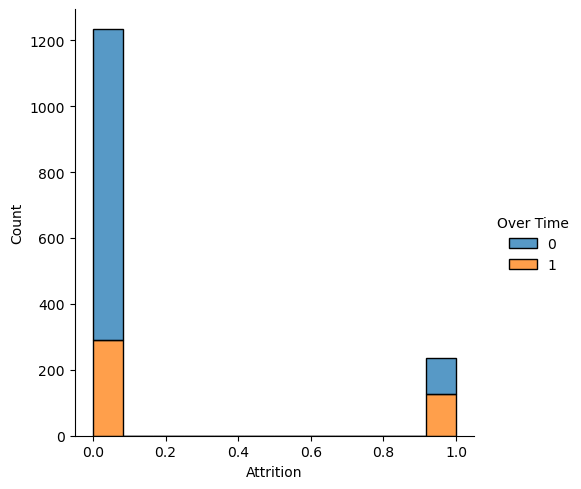

In [147]:
overtime_counts = df_attrition_happend['Over Time'].value_counts()
print(overtime_counts, '\n')
percent  = 127/234*100
print(f'{percent} % of employees who have quit their job were doing overtime')
sns.displot( x='Attrition', data=df, hue='Over Time', multiple='stack')

# 2. Employee Demographics:

### 2.1 What is the gender distribution among employees?

<function matplotlib.pyplot.show(close=None, block=None)>

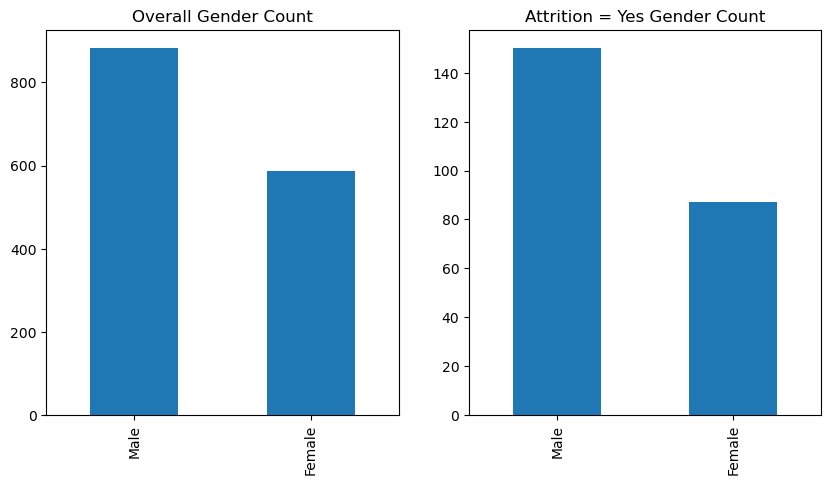

In [188]:
fig = plt.figure(figsize=(10,5))

fig.add_subplot(1,2,1) #row,col,postion
df['Gender'].value_counts().plot(kind='bar')
plt.title('Overall Gender Count')

fig.add_subplot(1,2,2) #row,col,postion
df_attrition_happend['Gender'].value_counts().plot(kind='bar')
plt.title('Attrition = Yes Gender Count')

plt.show

### <font color='darkblue'>As above plots describes there are more male employees in the organization and even in when it comes to quitting the jobs male employees are more likely to quite jobs </font>

In [164]:
df['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

In [165]:
df_attrition_happend['Gender'].value_counts()

Male      150
Female     87
Name: Gender, dtype: int64

In [169]:
male_quit_ration = 150/882*100 
female_quit_ration  = 87/588*100

### <font color='darkblue'> Male quitting their jobs in percent = 17.00 % and Female quitting their jobs in percent  = 14.79%</font>

### 2.2 Are there any differences in attrition rates based on education fields or levels?

In [177]:
df_attrition_happend['Education'].value_counts()

Bachelor's Degree    99
Master's Degree      58
Associates Degree    44
High School          31
Doctoral Degree       5
Name: Education, dtype: int64

### <font color='darkblue'>Lest's start with "Education" where Bachelor's Degree employees have quit their jobs most and Doctoral Degree employees have quit their jobs least this is possible because most of Doctoral Degree employees are on the higher management of the company.</font>

<AxesSubplot:ylabel='Education'>

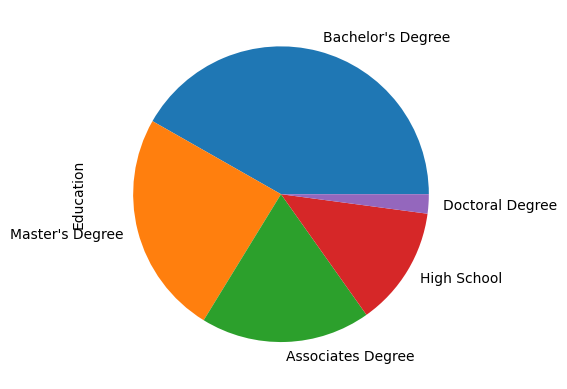

In [186]:
df_attrition_happend['Education'].value_counts().plot(kind='pie')

In [179]:
df_attrition_happend['Education Field'].value_counts()

Life Sciences       89
Medical             63
Marketing           35
Technical Degree    32
Other               11
Human Resources      7
Name: Education Field, dtype: int64

### <font color='darkblue'>In the Life Science and Medical field we can see ample amount of attrition rate as compare to other fields, as both of the fields combined contributes 50% + to the attrition rate</font>

<AxesSubplot:ylabel='Education Field'>

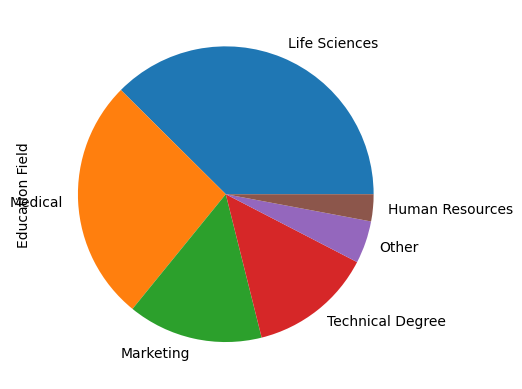

In [185]:
df_attrition_happend['Education Field'].value_counts().plot(kind='pie')

# 3. Job Role Analysis:

### 3.1 Which job roles have the highest and lowest attrition rates?

In [190]:
df_attrition_happend['Job Role'].value_counts()

Laboratory Technician        62
Sales Executive              57
Research Scientist           47
Sales Representative         33
Human Resources              12
Manufacturing Director       10
Healthcare Representative     9
Manager                       5
Research Director             2
Name: Job Role, dtype: int64

### <font color='darkblue'>62 Laboratory Technicians have quit their jobs which is the heightest for single role and Research DIrector has least attrition rate just of 2 which is grate thing.</font>

### 3.2 Do certain job roles require more training compared to others, and does that affect attrition?

In [196]:
df_attrition_happend['Training Times Last Year'].value_counts()

2    98
3    69
4    26
0    15
5    14
1     9
6     6
Name: Training Times Last Year, dtype: int64

In [197]:
df['Training Times Last Year'].value_counts()

2    547
3    491
4    123
5    119
1     71
6     65
0     54
Name: Training Times Last Year, dtype: int64

In [221]:
job_role_group_df = df.groupby('Job Role').count()
job_role_group_df = job_role_group_df.reset_index()
job_role_group_df[['Training Times Last Year','Job Role']].sort_values(by='Training Times Last Year', ascending=False)

,Training Times Last Year,Job Role
7,326,Sales Executive
6,292,Research Scientist
2,259,Laboratory Technician
4,145,Manufacturing Director
0,131,Healthcare Representative
3,102,Manager
8,83,Sales Representative
5,80,Research Director
1,52,Human Resources


#### 1.  Complete Dataset ⬆️

In [207]:
job_role_group = df_attrition_happend.groupby('Job Role').count()

In [208]:
job_role_group = job_role_group.reset_index()

In [222]:
job_role_group[['Training Times Last Year','Job Role']].sort_values(by='Training Times Last Year',ascending=False)

,Training Times Last Year,Job Role
2,62,Laboratory Technician
7,57,Sales Executive
6,47,Research Scientist
8,33,Sales Representative
1,12,Human Resources
4,10,Manufacturing Director
0,9,Healthcare Representative
3,5,Manager
5,2,Research Director


#### 2. Above =  Attrition Dataset  ⬆️

### <font color='darkblue'>From the 1st dataframe we can see 'Laboratory Technician','Sales Executive','Research Scientist' are the top 3 fields whoes employees were undergone for training and same 3 fields are in top 3 for dataset where employees have quite their job  </font>

# 4. Employee Performance and Satisfaction

### 4.1 Is there a relationship between performance ratings and attrition rates?


In [229]:
df_attrition_happend['Performance Rating'].unique()

array([3, 4])

<AxesSubplot:>

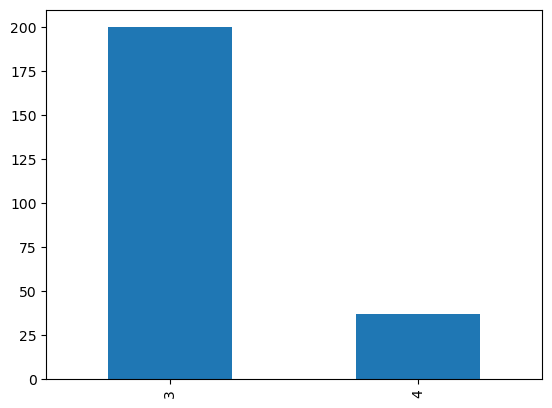

In [230]:
df_attrition_happend['Performance Rating'].value_counts().plot(kind='bar')

### <font color='darkblue'>From the above observation we can say employees with performance of 3 are more likely to quit their jobs </font>

In [231]:
df.head()

,Attrition,Business Travel,CF_age band,CF_attrition label,Department,Education Field,emp no,Employee Number,Gender,Job Role,...,Performance Rating,Relationship Satisfaction,Standard Hours,Stock Option Level,Total Working Years,Work Life Balance,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager
0,1,Travel_Rarely,35 - 44,Ex-Employees,Sales,Life Sciences,STAFF-1,1,Female,Sales Executive,...,3,1,80,0,8,1,6,4,0,5
1,0,Travel_Frequently,45 - 54,Current Employees,R&D,Life Sciences,STAFF-2,2,Male,Research Scientist,...,4,4,80,1,10,3,10,7,1,7
2,1,Travel_Rarely,35 - 44,Ex-Employees,R&D,Other,STAFF-4,4,Male,Laboratory Technician,...,3,2,80,0,7,3,0,0,0,0
3,0,Travel_Frequently,25 - 34,Current Employees,R&D,Life Sciences,STAFF-5,5,Female,Research Scientist,...,3,3,80,0,8,3,8,7,3,0
4,0,Travel_Rarely,25 - 34,Current Employees,R&D,Medical,STAFF-7,7,Male,Laboratory Technician,...,3,4,80,1,6,3,2,2,2,2


### 4.2 How does employee satisfaction (environment satisfaction, job satisfaction, relationship satisfaction) impact attrition?


### Environment satisfaction

<AxesSubplot:>

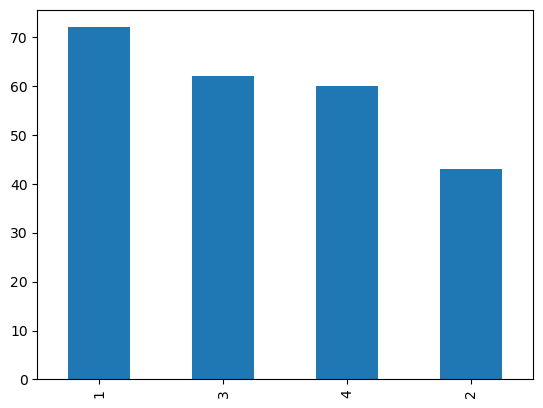

In [235]:
df_attrition_happend['Environment Satisfaction'].value_counts().plot(kind='bar')

### Job satisfaction

<AxesSubplot:>

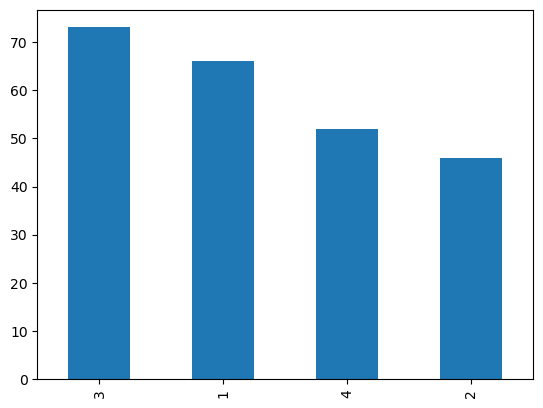

In [237]:
df_attrition_happend['Job Satisfaction'].value_counts().plot(kind='bar')

### Relationship satisfaction

<AxesSubplot:>

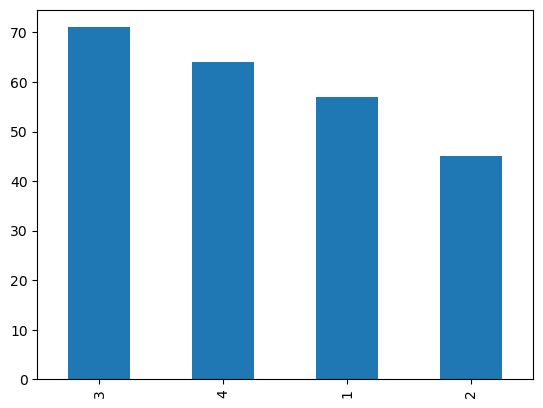

In [238]:
df_attrition_happend['Relationship Satisfaction'].value_counts().plot(kind='bar')

# 5. Work-Life Balance and Employee Tenure:


### 5.1 Does work-life balance impact the number of years an employee stays with the company?

In [335]:
attrition_not_happend_filt = df['Attrition'] == 0
df_attrition_not_happend = df[attrition_not_happend_filt]

1     20
2     12
4      9
10     9
7      6
0      5
5      5
6      3
3      3
8      2
9      2
14     2
40     1
11     1
21     1
19     1
23     1
Name: Years At Company, dtype: int64


<AxesSubplot:>

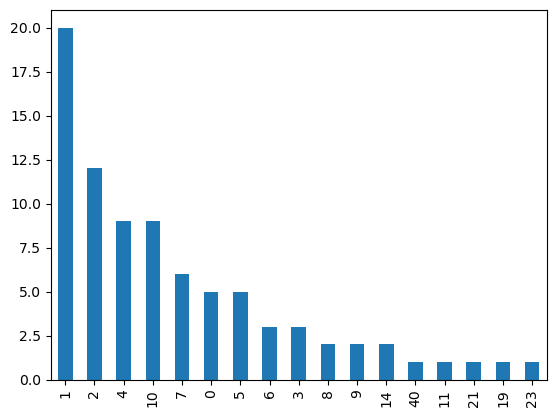

In [334]:
work_life_filt =  df_attrition_happend['Work Life Balance'] <=2
work_life = df_attrition_happend[work_life_filt]
print(work_life['Years At Company'].value_counts())
work_life['Years At Company'].value_counts().plot(kind='bar')

### <font color='darkblue'>The above plot describes the number of employees who have quit their jobs and whose work-life balance score was below average, and it is really visible that out of 83 employees with less balance, 37 chose to quit the company in 0 to 2 years, so yes, it really affects the attrition rate.
</font>

### 5.2 Is there any correlation between the total working years and attrition rates?

In [345]:
df_attrition_happend['Total Working Years'].value_counts()

1     40
10    25
6     22
7     18
8     16
5     16
4     12
9     10
3      9
2      9
11     7
15     5
12     5
0      5
14     4
18     4
17     3
24     3
13     3
16     3
19     3
22     2
23     2
40     2
20     2
33     1
21     1
26     1
31     1
34     1
25     1
28     1
Name: Total Working Years, dtype: int64

In [349]:
df_attrition_happend['Total Working Years'].mean()

8.244725738396625

In [347]:
df_attrition_happend['Years At Company'].mean()

5.1308016877637135

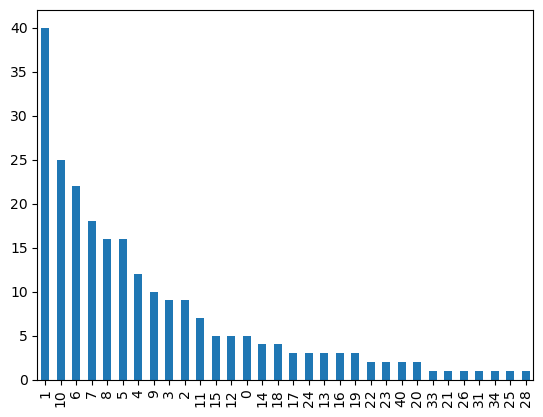

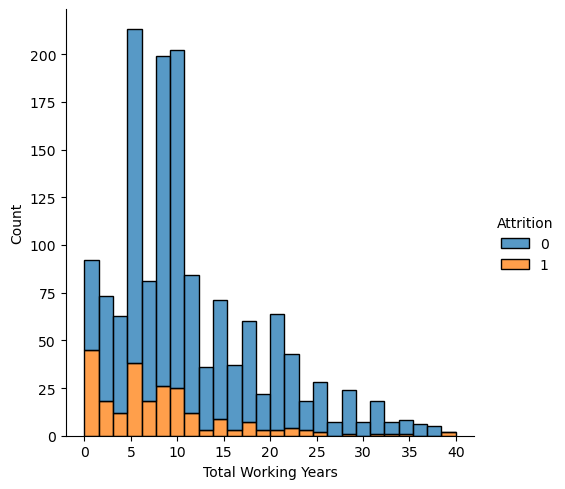

In [370]:
df_attrition_happend['Total Working Years'].value_counts().plot(kind='bar')
sns.displot( x='Total Working Years', data=df, hue='Attrition', multiple='stack')

### <font color='darkblue'>So from the above plot, we can say that employees with experience around 8–10 years are quitting the company because either they have a better opportunity somewhere else or they're starting their own business after getting experience of almost a decade in the industry
</font>

### <font color='darkblue'>When it comes to employees with 20+ years of experience, the most likely case for them must be they are retiring from the work and living peacefully
</font>

# 6. Compensation and Attrition:

### 6.1 Is there a difference in attrition rates based on the distance from home or the daily rate of employees?

In [10]:
df_attrition_happend['Distance From Home'].value_counts().mean()

8.172413793103448

### 6.2 How do monthly income or salary hikes influence attrition

In [563]:
df_attrition_not_happend['Monthly Income'].mean()

6832.739659367397

In [564]:
df_attrition_happend['Monthly Income'].mean()

4787.0928270042195

### <font color='darkblue'>Employees who leave the company have an average salary approximately 2000/- lower than those who remain.</font>

<AxesSubplot:>

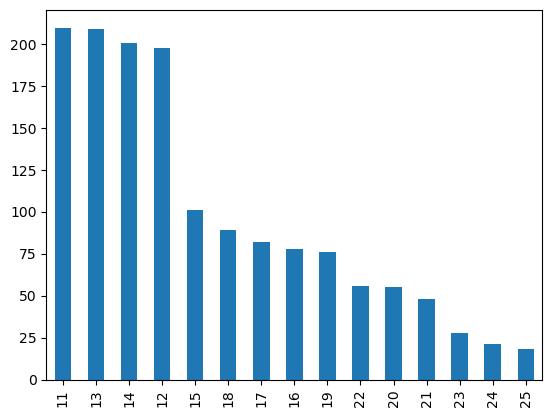

In [560]:
df['Percent Salary Hike'].value_counts().plot(kind='bar')

<AxesSubplot:>

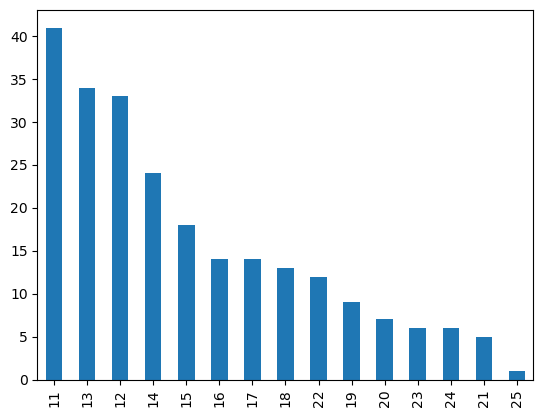

In [562]:
df_attrition_happend['Percent Salary Hike'].value_counts().plot(kind='bar')

### <font color='darkblue'>So, from the above graph, we can say that the percentage hike does not contribute more to the attrition rate than the average salary does.
</font>

# 7. Promotion and Career Development:

### 7.1 Are employees who stay longer with the company more likely to get promotions?

In [419]:
fresh_emp = df[df['Years At Company'] <= 2]
fresh_emp.shape[0]

342

In [420]:
fresh_emp[(fresh_emp['Years Since Last Promotion'] <=1) ]

,Attrition,Business Travel,CF_age band,CF_attrition label,Department,Education Field,emp no,Employee Number,Gender,Job Role,...,Performance Rating,Relationship Satisfaction,Standard Hours,Stock Option Level,Total Working Years,Work Life Balance,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager
2,1,Travel_Rarely,35 - 44,Ex-Employees,R&D,Other,STAFF-4,4,Male,Laboratory Technician,...,3,2,80,0,7,3,0,0,0,0
6,0,Travel_Rarely,Over 55,Current Employees,R&D,Medical,STAFF-10,10,Female,Laboratory Technician,...,4,1,80,3,12,2,1,0,0,0
7,0,Travel_Rarely,25 - 34,Current Employees,R&D,Life Sciences,STAFF-11,11,Male,Laboratory Technician,...,4,2,80,1,1,3,1,0,0,0
13,0,Travel_Rarely,25 - 34,Current Employees,R&D,Medical,STAFF-18,18,Male,Laboratory Technician,...,3,3,80,1,3,3,2,2,1,2
17,0,Non-Travel,Under 25,Current Employees,R&D,Medical,STAFF-22,22,Male,Laboratory Technician,...,3,2,80,2,1,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1450,1,Travel_Rarely,25 - 34,Ex-Employees,R&D,Medical,STAFF-1604,1604,Male,Laboratory Technician,...,3,3,80,3,1,3,1,1,0,0
1462,1,Non-Travel,35 - 44,Ex-Employees,R&D,Life Sciences,STAFF-1458,1458,Female,Laboratory Technician,...,4,2,80,0,11,4,1,0,0,0
1464,1,Travel_Rarely,25 - 34,Ex-Employees,Sales,Life Sciences,STAFF-1758,1758,Female,Sales Executive,...,4,3,80,0,11,2,0,0,0,0
1466,1,Travel_Frequently,25 - 34,Ex-Employees,R&D,Life Sciences,STAFF-1868,1868,Male,Research Scientist,...,4,2,80,0,1,2,1,0,1,0


### <font color='darkblue'> 242 out of 342 employees (70%) who joined the company in the last 2 years got promoted.<br/> <br/>So we can say that company is also focusing on new employees's performance and if they are performing well they are also being promoted.
</font>

### 7.2 Does the number of years in the current role affect attrition rates?

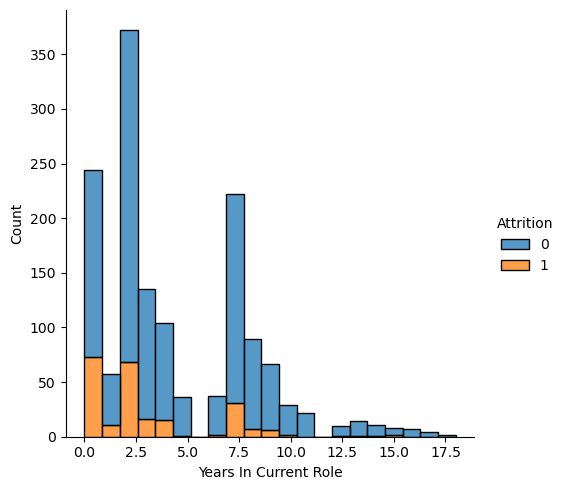

In [371]:
sns.displot( x='Years In Current Role', data=df, hue='Attrition', multiple='stack')

# 8. Departmental Analysis

### 8.1 Is there a particular department with consistently high or low attrition rates? 

In [425]:
df_attrition_happend['Department'].value_counts()

R&D      133
Sales     92
HR        12
Name: Department, dtype: int64

### <font color='darkblue'> Employees from R&D department are quitting jobs in large numbers (133) and HR Department is having least attrition rate.  
</font>

### 8.2 Are there any trends in the relationship between employee education level and department?


In [444]:
rnd_df = df[df['Department']=='R&D']
sales_df = df[df['Department']=='Sales']
hr_df = df[df['Department']=='HR']

<function matplotlib.pyplot.show(close=None, block=None)>

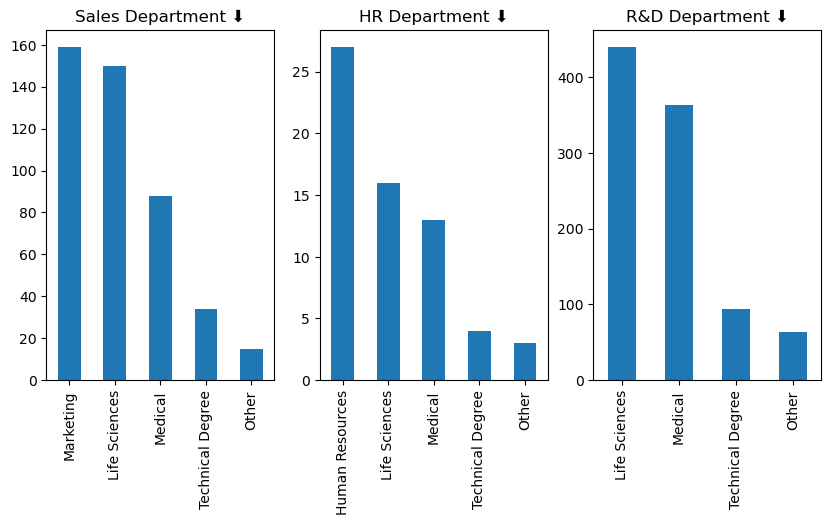

In [478]:
fig = plt.figure(figsize=(10,10))

fig.add_subplot(2,3,1) #row,col,postion
sales_df['Education Field'].value_counts().plot(kind='bar')
plt.title('Sales Department ⬇️')

fig.add_subplot(2,3,2) #row,col,postion
hr_df['Education Field'].value_counts().plot(kind='bar')
plt.title('HR Department ⬇️')

fig.add_subplot(2,3,3) #row,col,postion
rnd_df['Education Field'].value_counts().plot(kind='bar')
plt.title('R&D Department ⬇️')
plt.show

### <font color='darkblue'>Above all, the charts clearly show that most of the employees in each department are from relevant and related educational fields.
</font>

<function matplotlib.pyplot.show(close=None, block=None)>

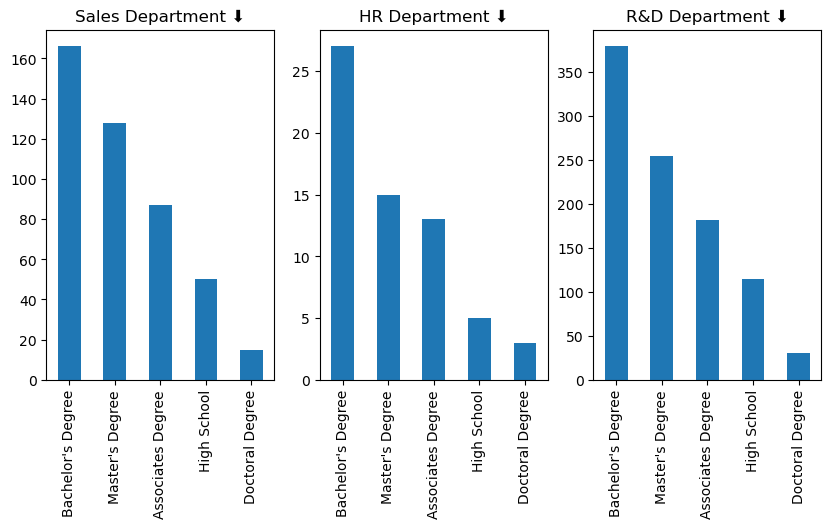

In [477]:
fig = plt.figure(figsize=(10,10))

fig.add_subplot(2,3,1) #row,col,postion
sales_df['Education'].value_counts().plot(kind='bar')
plt.title('Sales Department ⬇️')

fig.add_subplot(2,3,2) #row,col,postion
hr_df['Education'].value_counts().plot(kind='bar')
plt.title('HR Department ⬇️')

fig.add_subplot(2,3,3) #row,col,postion
rnd_df['Education'].value_counts().plot(kind='bar')
plt.title('R&D Department ⬇️')
plt.show

### <font color='darkblue'>And each department have most employees from bachelor's degree followed by master's degree
</font>

# 9. Work Environment and Job Satisfaction

### 9.1 How does the work environment satisfaction impact job satisfaction and, in turn, attrition?

In [494]:
print('Total Environment Satisfaction ')
df['Environment Satisfaction'].value_counts()

Total Environment Satisfaction 


3    453
4    446
2    287
1    284
Name: Environment Satisfaction, dtype: int64

In [495]:
print('Total Job Satisfaction ')
df['Job Satisfaction'].value_counts()

Total Job Satisfaction 


4    459
3    442
1    289
2    280
Name: Job Satisfaction, dtype: int64

In [498]:
print('Environment Satisfaction of employees who have quit the company')
df_attrition_happend['Environment Satisfaction'].value_counts()

Environment Satisfaction of employees who have quit the company


1    72
3    62
4    60
2    43
Name: Environment Satisfaction, dtype: int64

In [497]:
print('Job Satisfaction of employees who have quit the company')
df_attrition_happend['Job Satisfaction'].value_counts()

Job Satisfaction of employees who have quit the company


3    73
1    66
4    52
2    46
Name: Job Satisfaction, dtype: int64

In [487]:
Env_job_ins = df_attrition_happend[(df_attrition_happend['Job Satisfaction'] <=2) & (df_attrition_happend['Environment Satisfaction'] <=2) ]

In [489]:
Env_job_ins.shape[0]

58

### <font color='darkblue'> As we can see, employees of the company have job and environment satisfaction of 3 and 4 points <br/> <br/> but when we dive deeper and see that employees who have quit the company have environment satisfaction of 1, we have 72 in total, and with job satisfaction of 1 point, we have 66 employees.
</font>

### <font color='darkblue'> and out of 237 employees who have quit the company, there are 58 who had both job and environment satisfaction below or equal to 2 points
</font>




### 9.2 Is there any relationship between job involvement and attrition?

In [501]:
print('Job Involvement of employees')
df['Job Involvement'].value_counts()

Job Involvement of employees


3    868
2    375
4    144
1     83
Name: Job Involvement, dtype: int64

In [502]:
print('Job Involvement of employees who have quit the company')
df_attrition_happend['Job Involvement'].value_counts()

Job Involvement of employees who have quit the company


3    125
2     71
1     28
4     13
Name: Job Involvement, dtype: int64

In [514]:
print(f'Job Involvment of 4 and % of employees who have quit their jobs : {(13/144)*100} %')
print(f'Job Involvment of 3 and % of employees who have quit their jobs : {(125/868)*100} %')
print(f'Job Involvment of 2 and % of employees who have quit their jobs : {(71/375)*100} %')
print(f'Job Involvment of 1 and % of employees who have quit their jobs : {(28/83)*100} %')

Job Involvment of 4 and % of employees who have quit their jobs : 9.027777777777777 %
Job Involvment of 3 and % of employees who have quit their jobs : 14.400921658986174 %
Job Involvment of 2 and % of employees who have quit their jobs : 18.933333333333334 %
Job Involvment of 1 and % of employees who have quit their jobs : 33.734939759036145 %


### <font color='darkblue'>From the above insights, we can say that employees with a lower job involvement point (below 3) are more likely to quit their jobs, around 52% of employees who have quit their jobs have given less than 3 points in job involvement.
.
</font>


# 10. Performance vs. Education:

### 10.1 Do employees with higher levels of education perform better or have higher job satisfaction

4    130
3    127
1     74
2     67
Name: Job Satisfaction, dtype: int64


<AxesSubplot:>

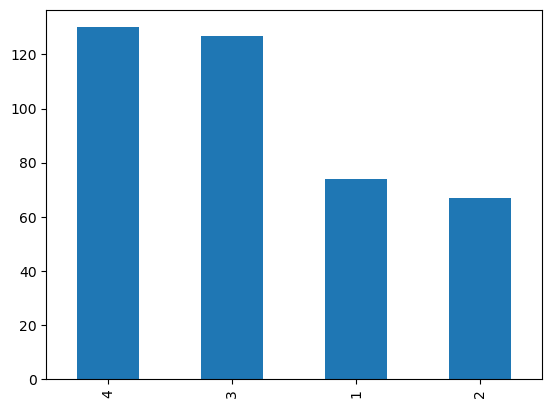

In [529]:
high_ed_emp = df[(df['Education'] == "Master's Degree") | (df['Education'] == "Doctoral Degree Degree")]
print(high_ed_emp['Job Satisfaction'].value_counts())
high_ed_emp['Job Satisfaction'].value_counts().plot(kind='bar')

### <font color='darkblue'>Yes, we can clearly see that employees with higher education degrees are really satisfied with their job and have given a great satisfaction point (3 or 4).
</font>

### 10.2 How does the education level affect the number of companies an employee has worked for?

In [533]:
df['Education'].value_counts()

Bachelor's Degree    572
Master's Degree      398
Associates Degree    282
High School          170
Doctoral Degree       48
Name: Education, dtype: int64

In [539]:
ed_bd = df[df['Education']=="Bachelor's Degree"]
ed_ms = df[df['Education']=="Master's Degree"]
ed_as = df[df['Education']=="Associates Degree"]
ed_hs = df[df['Education']=="High School"]
ed_dd = df[df['Education']=="Doctoral Degree"]


In [535]:
ed_bd['Num Companies Worked'].value_counts()

1    202
4     73
0     71
2     60
3     50
5     31
6     25
7     23
8     20
9     17
Name: Num Companies Worked, dtype: int64

In [536]:
ed_ms['Num Companies Worked'].value_counts()

1    115
3     51
0     49
2     46
4     37
6     28
9     24
7     22
8     17
5      9
Name: Num Companies Worked, dtype: int64

In [537]:
ed_as['Num Companies Worked'].value_counts()

1    106
0     38
3     33
2     28
4     19
7     15
6     13
5     13
8      9
9      8
Name: Num Companies Worked, dtype: int64

In [540]:
ed_hs['Num Companies Worked'].value_counts()

1    88
0    33
3    16
7    10
5     6
2     5
4     4
8     3
6     3
9     2
Name: Num Companies Worked, dtype: int64

In [541]:
ed_dd['Num Companies Worked'].value_counts()

1    10
3     9
2     7
4     6
0     6
5     4
7     4
9     1
6     1
Name: Num Companies Worked, dtype: int64

<AxesSubplot:xlabel='Education', ylabel='Num Companies Worked'>

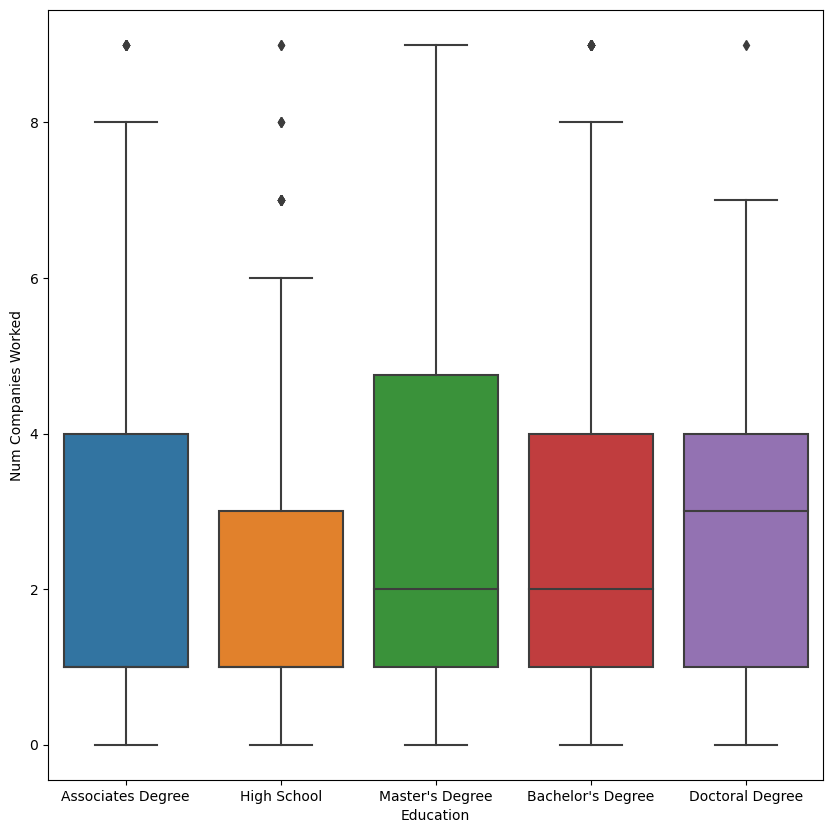

In [544]:
fig = plt.figure(figsize=(10,10))
sns.boxplot(x='Education', y='Num Companies Worked', data=df)

In [545]:
avg_companies_by_education = df.groupby('Education')['Num Companies Worked'].mean()
avg_companies_by_education

Education
Associates Degree    2.585106
Bachelor's Degree    2.697552
Doctoral Degree      2.875000
High School          1.894118
Master's Degree      3.082915
Name: Num Companies Worked, dtype: float64

### <font color='darkblue'>As per the above observations, we can say that employees with lower education, like those in high school with the most obvious small roles, are sticking to the company most as they do not have any expertise and lack ambition, whereas on the other side, master's degree & bachelor's Degree employees are switching the company more frequently because they have access to a better job portal and connections, plus once they gain expertise in a field, they try to learn new things. 

</font>